In [115]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
import scipy.constants as const

Sättigungsstrom bei 2,0A= 0.00017999999999999998  mA
Sättigungsstrom bei 2,2A= 0.00063  mA
Sättigungsstrom bei 2,3A= 0.00131  mA
Sättigungsstrom bei 2,4A>= 0.00222  mA
Sättigungsstrom bei 2,5A>= 0.0029300000000000003  mA


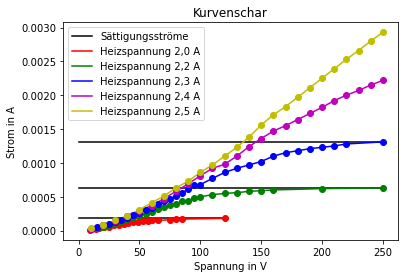

In [107]:
# Daten einlesen
U1=np.genfromtxt('schar1.dat', usecols=(0))
A1r=np.genfromtxt('schar1.dat', usecols=(1))
U2=np.genfromtxt('schar2.dat', usecols=(0))
A2r=np.genfromtxt('schar2.dat', usecols=(1))
U3=np.genfromtxt('schar3.dat', usecols=(0))
A3r=np.genfromtxt('schar3.dat', usecols=(1))
U4=np.genfromtxt('schar4.dat', usecols=(0))
A4r=np.genfromtxt('schar4.dat', usecols=(1))
U5=np.genfromtxt('schar5.dat', usecols=(0))
A5r=np.genfromtxt('schar5.dat', usecols=(1))

# mA in A umrechnen
A1=A1r/1000
A2=A2r/1000
A3=A3r/1000
A4=A4r/1000
A5=A5r/1000

# Sättigungsströme
IS1=A1[len(A1)-1]
IS2=A2[len(A2)-1]
IS3=A3[len(A3)-1]
IS4=A4[len(A4)-1]
IS5=A5[len(A5)-1]
IS=[IS1,IS2,IS3,IS4,IS5]
print('Sättigungsstrom bei 2,0A=',IS1,' mA')
print('Sättigungsstrom bei 2,2A=',IS2,' mA')
print('Sättigungsstrom bei 2,3A=',IS3,' mA')
print('Sättigungsstrom bei 2,4A>=',IS4,' mA')
print('Sättigungsstrom bei 2,5A>=',IS5,' mA')

x=np.linspace(1e-20,250)
y=np.linspace(1e-20,120)

# Plot
plt.plot(y,IS1*(y/y),'k-',label='Sättigungsströme')
plt.plot(x,IS2*(x/x),'k-')
plt.plot(x,IS3*(x/x),'k-')
plt.plot(U1,A1,'r-',label='Heizspannung 2,0 A')
plt.plot(U2,A2,'g-',label='Heizspannung 2,2 A')
plt.plot(U3,A3,'b-',label='Heizspannung 2,3 A')
plt.plot(U4,A4,'m-',label='Heizspannung 2,4 A')
plt.plot(U5,A5,'y-',label='Heizspannung 2,5 A')
plt.plot(U1,A1,'ro')
plt.plot(U2,A2,'go')
plt.plot(U3,A3,'bo')
plt.plot(U4,A4,'mo')
plt.plot(U5,A5,'yo')
plt.title('Kurvenschar')
plt.xlabel('Spannung in V')
plt.ylabel('Strom in A')
plt.legend(loc='best')
plt.savefig('schar.pdf')

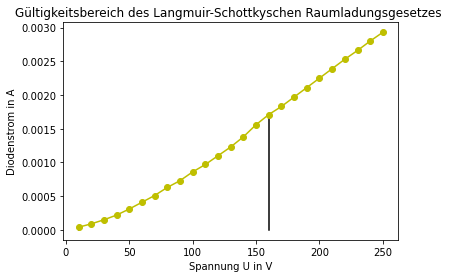

In [126]:
LSu=0
LSo=15
z1=np.linspace(1e-20,A5[LSo])
z2=np.linspace(1e-20,A5[LSu])

plt.plot(U5[LSo]*(z1/z1),z1,'k-')
plt.plot(U5[LSu]*(z2/z2),z2,'k-')
plt.plot(U5,A5,'y-')
plt.plot(U5,A5,'yo')
plt.title('Gültigkeitsbereich des Langmuir-Schottkyschen Raumladungsgesetzes ')
plt.xlabel('Spannung U in V')
plt.ylabel('Diodenstrom in A')
plt.savefig('raumladungsgesetz.pdf')

c = 0.00000001209310426675 ± 0.00000000021467049802
T = 1747.32077244649735803250 ± 48.62675941757321851355


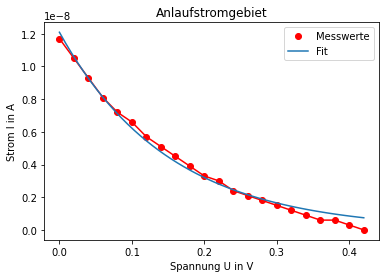

In [128]:
# Untersucheungen im Alaufstromgebiet

# Daten einlesen
UG=1*np.genfromtxt('gegenfeld.dat', usecols=(0))
AGr=np.genfromtxt('gegenfeld.dat', usecols=(1))
AG=AGr*(0.3e-9)
a=np.linspace(0,0.42)
#Konstanten
e0=const.e
k=const.k
# Fit
def temperatur(V, c,T):
    return (c*np.exp(-(e0*V)/(k*T))) 


params, covariance_matrix = curve_fit(temperatur, UG, AG, p0=(0.000000001,1700))

uncertainties = np.sqrt(np.diag(covariance_matrix))

for name, value, uncertainty in zip('cT', params, uncertainties): 
    print(f'{name} = {value:8.20f} ± {uncertainty:.20f}')

plt.plot(UG,AG,'ro',label='Messwerte')
plt.plot(UG,AG,'r-')
plt.plot(a, temperatur(a, *params),label='Fit')
plt.title('Anlaufstromgebiet')
#plt.yscale("log")
plt.xlabel('Spannung U in V')
plt.ylabel('Strom I in A')
plt.legend(loc='best')
plt.savefig('anlaufstrom.pdf')

In [118]:
# Abschätzung der Kathodentemperatur
f=0.32/10000
eta=0.28
SB=const.sigma
NWL=0.95
Uf=[4.0, 4.0, 4.5, 5.0, 5.5]
If=[2.0, 2.2, 2.3, 2.4, 2.5]



Temp=[0,0,0,0,0]
i=0
while i<len(Uf):
    Temp[i]=((If[i]*Uf[i]-NWL)/(f*eta*SB))**(1/4)
    print('Gesch. Kathodentemperatur bei ', If[i],' A Heizstrom =',Temp[i],' K')
    i=i+1


Gesch. Kathodentemperatur bei  2.0  A Heizstrom = 1930.044590029712  K
Gesch. Kathodentemperatur bei  2.2  A Heizstrom = 1982.6108456806337  K
Gesch. Kathodentemperatur bei  2.3  A Heizstrom = 2073.9678835246236  K
Gesch. Kathodentemperatur bei  2.4  A Heizstrom = 2159.5369183901544  K
Gesch. Kathodentemperatur bei  2.5  A Heizstrom = 2240.3844818426132  K


In [129]:
# Berechnung der Austrittsarbeit
j=0
h=const.h
pi=const.pi
m0=const.m_e
e0phi=[0,0,0,0,0]
while j <len(Temp):
    e0phi[j]=-1*np.log((IS[j]*h**3)/(4*pi*e0*m0*k**2*Temp[j]**2))*k*Temp[j]
    print('e0phi bei T=',Temp[j],'ist =',e0phi[j],'J =',e0phi[j]/const.e,'eV')
    j=j+1
e0phid=sum(e0phi)/len(e0phi)
e0phidf=np.std(e0phi)/np.sqrt(np.size(e0phi))
durchschnitt=ufloat(e0phid,e0phidf)
print('Durchschnittliche Austrittsarbeit=',durchschnitt/const.e,'eV')

e0phi bei T= 1930.044590029712 ist = 1.0059942079507779e-18 J = 6.278921977779748 eV
e0phi bei T= 1982.6108456806337 ist = 1.0005725864415952e-18 J = 6.2450828779318925 eV
e0phi bei T= 2073.9678835246236 ist = 1.02829597724007e-18 J = 6.418118673175395 eV
e0phi bei T= 2159.5369183901544 ist = 1.0574057962053462e-18 J = 6.599807872403076 eV
e0phi bei T= 2240.3844818426132 ist = 1.0906826558447126e-18 J = 6.8075056938117395 eV
Durchschnittliche Austrittsarbeit= 6.47+/-0.09 eV


x = 1.45030664792117169881 ± 0.01366661233921914916
a = 1.47577108007464308237 ± 0.04833139126948657327


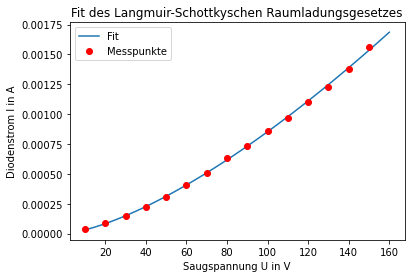

In [144]:
# Exponentenfit
q=0
X=[0]
U5ex=X*LSo
A5ex=X*LSo
while q<len(U5ex):
    U5ex[q]=U5[q]
    A5ex[q]=A5[q]
    q=q+1
Konstante=(4/9)*const.epsilon_0*np.sqrt(2*e0/m0)
def exponent(V,x,a):
    return (Konstante*V**x/a**2)

params2, covariance_matrix2 = curve_fit(exponent, U5ex,A5ex)

uncertainties2 = np.sqrt(np.diag(covariance_matrix2))

for name, value, uncertainty in zip('xa', params2, uncertainties2): 
    print(f'{name} = {value:8.20f} ± {uncertainty:.20f}')
b=np.linspace(10,160)

plt.plot(b, exponent(b, *params2),label='Fit')
plt.plot(U5ex,A5ex,'ro',label='Messpunkte')
plt.title('Fit des Langmuir-Schottkyschen Raumladungsgesetzes')
plt.xlabel('Saugspannung U in V')
plt.ylabel('Diodenstrom I in A')
plt.legend(loc='best')
plt.savefig('fit.pdf')